# Hospital Readmission

## Background

WellnessWorks is a healthcare company specializing in providing comprehensive health
services, including patient care, diagnostics, and preventive health measures. They aim to
leverage machine learning techniques to predict patient readmissions, improve patient outcomes,
and optimize hospital operations.

You have been hired as a Junior Data Analyst by Blink Health Solutions, the IT partner of
WellnessWorks. Blink Health wants you to investigate machine learning and its impact on
healthcare analytics. Additionally, you are required to develop a machine learning model for
WellnessWorks that can predict the likelihood of patient readmissions based on historical patient
data.

## Data

10 years of patient information:

Information in the file

- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')

### Loading the dataset from huggingface

In [2]:
import pandas as pd
import huggingface as hf


df = pd.read_csv("hf://datasets/prabinpanta0/genki_hospital/hospital_readmissions.csv")

In [3]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [4]:
# Complete analysis of the dataset
df.describe()


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [5]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [6]:
# column types
df.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [7]:
# Checking the unique values in the dataset
df.nunique()

age                    6
time_in_hospital      14
n_lab_procedures     109
n_procedures           7
n_medications         70
n_outpatient          23
n_inpatient           16
n_emergency           21
medical_specialty      7
diag_1                 8
diag_2                 8
diag_3                 8
glucose_test           3
A1Ctest                3
change                 2
diabetes_med           2
readmitted             2
dtype: int64

In [8]:
#checking the null value
df.isnull().sum()


age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [9]:
# Checking the duplicate values
df.duplicated().sum()


0

In [10]:

corr = df[['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']].corr()



In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


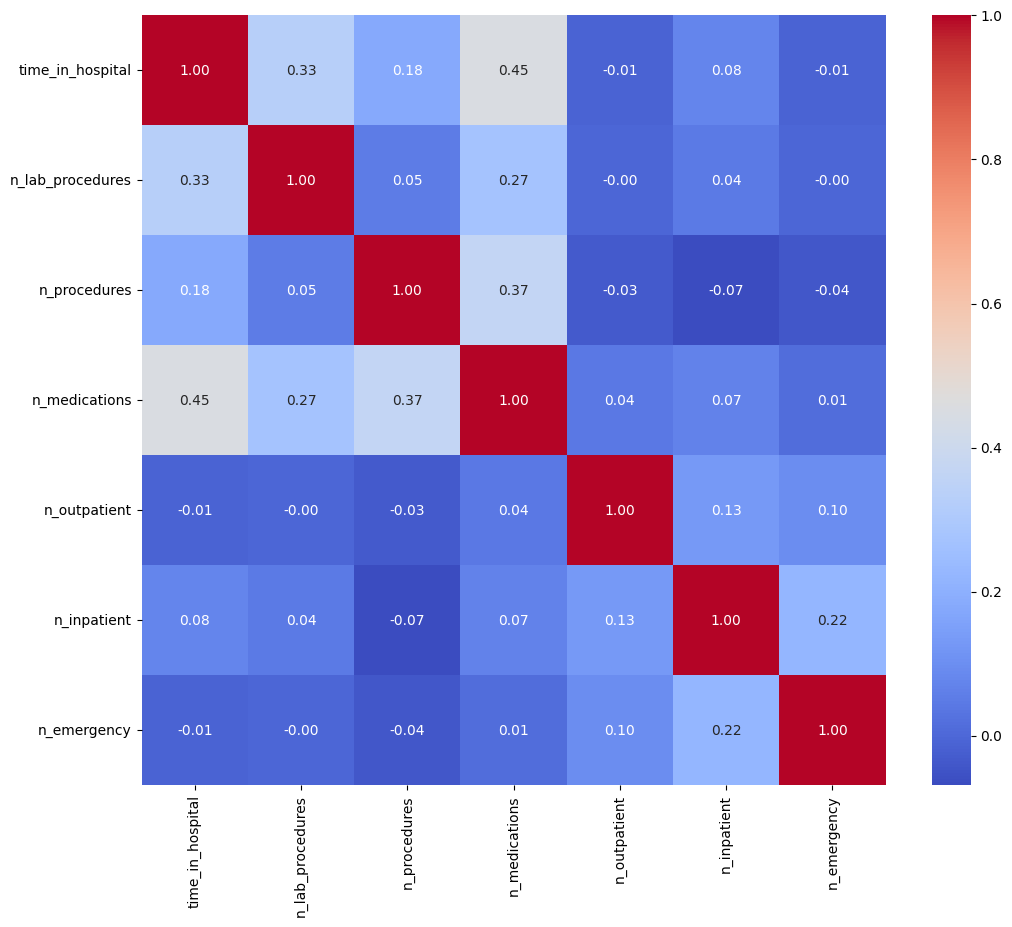

In [25]:
# Heatmap of the correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


## Age Group Relations

In [12]:
import matplotlib.pyplot as plt
age_counts = df['age'].value_counts().reset_index()
age_counts.columns = ['age', 'num_patients']


In [13]:
# Age group with the highest number of patients
age_counts[age_counts['num_patients'] == age_counts['num_patients'].max()]

,age,num_patients
0,[70-80),6837


In [14]:
# Age group with the lowest number of patients
age_counts[age_counts['num_patients'] == age_counts['num_patients'].min()]

,age,num_patients
5,[90-100),750


<BarContainer object of 6 artists>

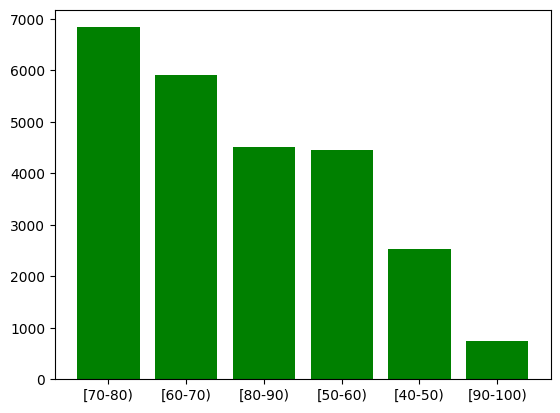

In [15]:
# Bar plot of age group and number of patients
plt.bar(age_counts['age'], age_counts['num_patients'], color='green')


In [16]:
# Age group and number of times in the hospital
age_hospital = df.groupby('age')['time_in_hospital'].sum().reset_index()
age_hospital.columns = ['age', 'time_in_hospital']

# Age group with the highest number of times in the hospital
print("Highest number of times in the hospital")
print(age_hospital[age_hospital['time_in_hospital'] == age_hospital['time_in_hospital'].max()])

# Age group with the lowest number of times in the hospital
print("Lowest number of times in the hospital")
print(age_hospital[age_hospital['time_in_hospital'] == age_hospital['time_in_hospital'].min()])


Highest number of times in the hospital
       age  time_in_hospital
3  [70-80)             31444
Lowest number of times in the hospital
        age  time_in_hospital
5  [90-100)              3572


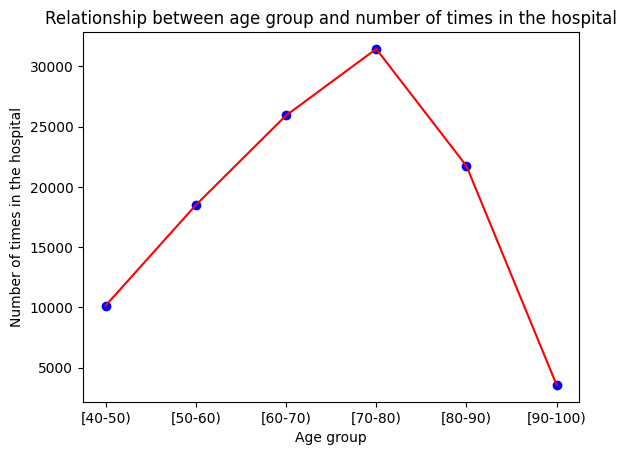

In [22]:
# Relationship plot between age group and number of times in the hospital
plt.plot(age_hospital['age'], age_hospital['time_in_hospital'], color='red')
plt.scatter(age_hospital['age'], age_hospital['time_in_hospital'], color='blue')
plt.xlabel('Age group')
plt.ylabel('Number of times in the hospital')
plt.title('Relationship between age group and number of times in the hospital')
plt.show()


Age group with the highest number of emergency visits
       age  n_emergency
1  [50-60)         1022
Age group with the lowest number of emergency visits
        age  n_emergency
5  [90-100)          104


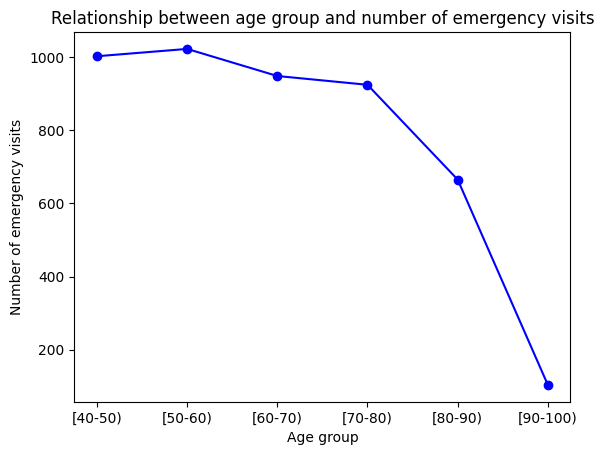

In [21]:
# Age Group and number of emergency visits
age_emergency = df.groupby('age')['n_emergency'].sum().reset_index()
age_emergency.columns = ['age', 'n_emergency']

# Age group with the highest number of emergency visits
print("Age group with the highest number of emergency visits")
print(age_emergency[age_emergency['n_emergency'] == age_emergency['n_emergency'].max()])

# Age group with the lowest number of emergency visits
print("Age group with the lowest number of emergency visits")
print(age_emergency[age_emergency['n_emergency'] == age_emergency['n_emergency'].min()])
# Relationship between age group and number of emergency visits
plt.plot(age_emergency['age'], age_emergency['n_emergency'], color='blue')
plt.scatter(age_emergency['age'], age_emergency['n_emergency'], color='blue')
plt.xlabel('Age group')
plt.ylabel('Number of emergency visits')
plt.title('Relationship between age group and number of emergency visits')
plt.show()


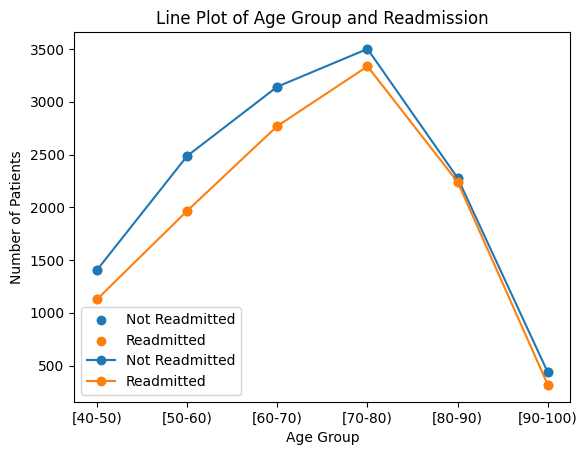

In [18]:
# Relationship between age and readmission
age_readmission = df.groupby('age')['readmitted'].value_counts().unstack().reset_index()
age_readmission.columns = ['age', 'no', 'yes']

# Scatter plot of age group and readmission
plt.scatter(age_readmission['age'], age_readmission['no'], label='Not Readmitted')
plt.scatter(age_readmission['age'], age_readmission['yes'], label='Readmitted')
plt.plot(age_readmission['age'], age_readmission['no'], label='Not Readmitted', marker='o')
plt.plot(age_readmission['age'], age_readmission['yes'], label='Readmitted', marker='o')

plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Line Plot of Age Group and Readmission')
plt.legend()
plt.show()


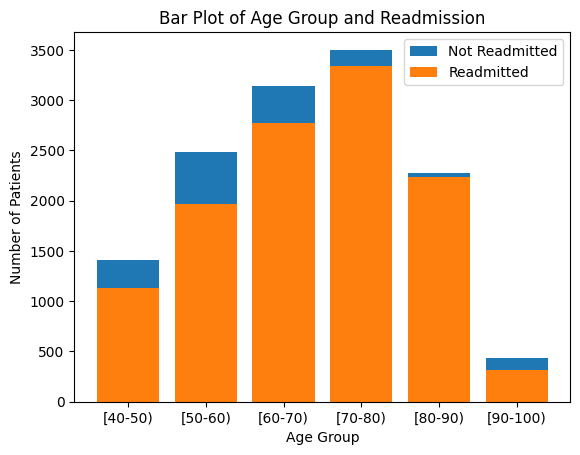

In [19]:
# Bar plot of age group and readmission status (seperatly)
plt.bar(age_readmission['age'], age_readmission['no'], label='Not Readmitted')
plt.bar(age_readmission['age'], age_readmission['yes'], label='Readmitted')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Bar Plot of Age Group and Readmission')
plt.legend()
plt.show()